<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/Locally_Linear_Embedding_on_crabs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The objective is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).**
Exercise:

Now Visualize the classes of the dataset.
Improve the Visualization applying the PCA technique

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import io

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
crabs_data = pd.read_csv('crabs.csv')

#rename columns
crabs_data = crabs_data.rename(columns = {'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline','CW':'Maximum Width','BD':'Body Depth'})
#rename data-entries
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


###Separating 200 crabs into 4 classes

In [ ]:
crabs_data['class'] =   crabs_data['species'] + crabs_data['sex']

crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


### Taking out continuous numerical features

In [ ]:
rel_feat = ['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width', 'Body Depth']

## Locally Linear Embedding

This method projects the data into a lower dimensional space trying to preserve the distances between neighbors.

So this method is based on local distances. When we work with distances it is important that all variables have the same range. Otherwise, a variable with large values could confuse the model.

To avoid these problems we will use the MinMaxScaler this time.

It Transforms features by scaling each feature to a given **range**.

In [ ]:
crabs_min_max = crabs_data.copy()

#make data range in [0, 1]
crabs_min_max[rel_feat] = MinMaxScaler().fit_transform(crabs_data[rel_feat])
crabs_min_max.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.500000,14.467083,1.0,13.000000,25.500000,38.000000,50.0
Frontal Lobe,200.0,0.527233,0.219832,0.0,0.358491,0.525157,0.682390,1.0
Rear Width,200.0,0.455365,0.187835,0.0,0.328467,0.459854,0.569343,1.0
Carapace Midline,200.0,0.529043,0.216382,0.0,0.382219,0.528875,0.684650,1.0
Maximum Width,200.0,0.515053,0.209919,0.0,0.384000,0.525333,0.664000,1.0
Body Depth,200.0,0.511645,0.220953,0.0,0.341935,0.503226,0.677419,1.0


###Use locally linear embedding

In [ ]:
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=15) #number of dimensions I need and neighbours(> D + 1)

crabs_lle = lle.fit_transform(crabs_min_max[rel_feat])

print("Reconstruction Error: ", lle.reconstruction_error_)

crabs_min_max[['LLE1', 'LLE2']] = crabs_lle

Reconstruction Error:  2.153028802201499e-06


In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,LLE1,LLE2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.145449,0.060973
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,-0.133111,0.057664
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,-0.126506,0.053316
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,-0.118650,0.028331
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,-0.117088,0.022013


### Plots for visualization

<Axes: xlabel='LLE1', ylabel='LLE2'>

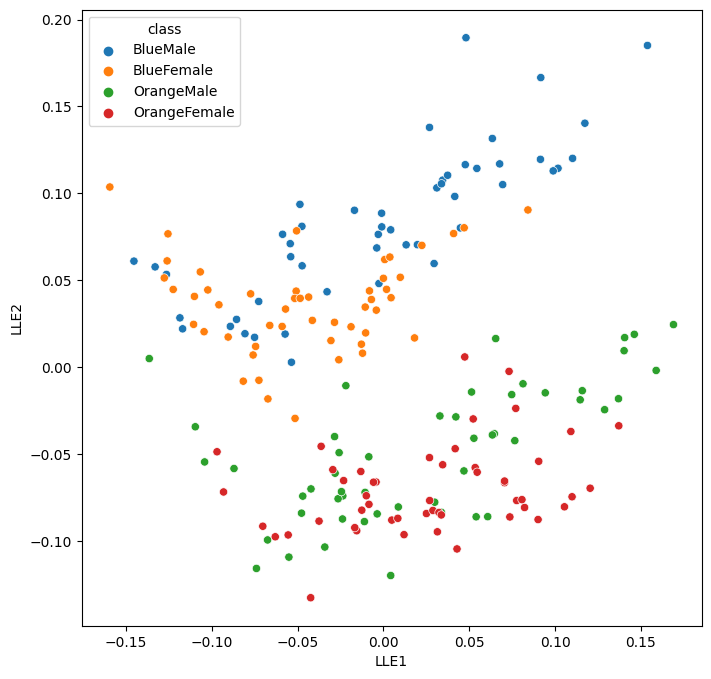

In [ ]:
fig = plt.figure(figsize=(8, 8))

sns.scatterplot(x='LLE1', y='LLE2', hue='class', data=crabs_min_max)

## LLE with 3 dimensions

In [ ]:
lle_3 = LocallyLinearEmbedding(n_components=3, n_neighbors=15)
crabs_lle_3 = lle_3.fit_transform(crabs_min_max[rel_feat])

print("Reconstruction Error: ", lle_3.reconstruction_error_)

crabs_min_max[['LLE1', 'LLE2', 'LLE3']] = crabs_lle_3

Reconstruction Error:  1.5214133598291706e-05


In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,LLE1,LLE2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.145449,0.060973
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,-0.133111,0.057664
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,-0.126506,0.053316
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,-0.118650,0.028331
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,-0.117088,0.022013


### Visualization

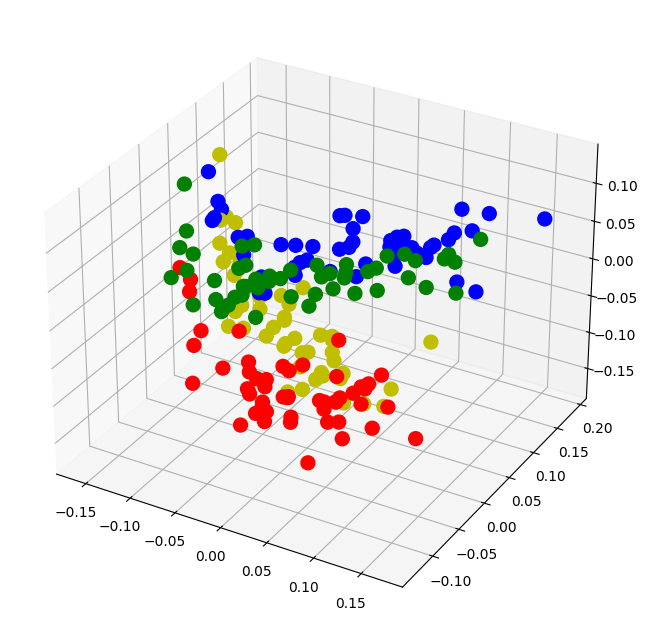

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

colors_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

plt.scatter(crabs_min_max.LLE1,crabs_min_max.LLE2,zs=crabs_min_max.LLE3,
            depthshade=False, c = crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)

### Using Plotly Express

In [ ]:
fig=px.scatter_3d(crabs_min_max, x='LLE1', y='LLE2', z='LLE3', color='class')
fig.show()